In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Antigenicity prediction

<ipython-input-36-eabe820b8a02>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', n_folds)


Fold 1
2/2 [==============================] - 0s 8ms/step
Fold 2
2/2 [==============================] - 0s 8ms/step
Fold 3
2/2 [==============================] - 0s 9ms/step
Fold 4
2/2 [==============================] - 0s 6ms/step
Fold 5
2/2 [==============================] - 0s 5ms/step
Fold 6
2/2 [==============================] - 0s 5ms/step
Fold 7
2/2 [==============================] - 0s 11ms/step
Fold 8
2/2 [==============================] - 0s 7ms/step
Fold 9
2/2 [==============================] - 0s 5ms/step
Fold 10
2/2 [==============================] - 0s 8ms/step


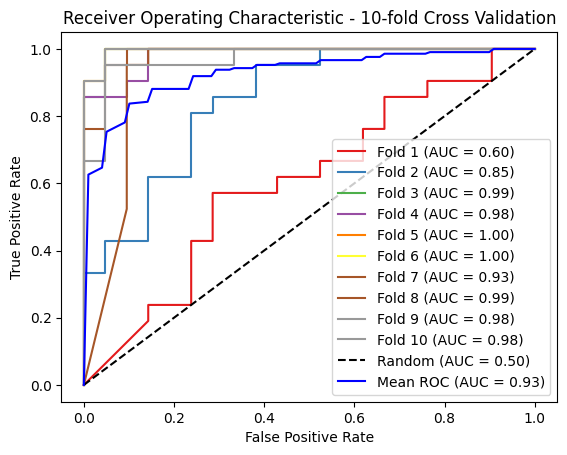

In [36]:
antigen_data = pd.read_csv("/content/drive/MyDrive/Postdoctoral research/poxipred/df_antigen.csv")

x = antigen_data.iloc[:, 0:45].values
y = antigen_data.iloc[:, 45].values

sc = StandardScaler()

x = sc.fit_transform(x)


antigen_model = keras.Sequential()
antigen_model.add(layers.Dense(50, activation='relu', input_shape=(45,)))
antigen_model.add(layers.Dense(50, activation='relu'))
antigen_model.add(layers.Dense(50, activation='relu'))
antigen_model.add(layers.Dense(1, activation='sigmoid'))

antigen_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

np.random.seed(42)

n_folds = 10

skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

interp_tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

colors = plt.cm.get_cmap('Set1', n_folds)

for i, (train_index, test_index) in enumerate(skf.split(x, y)):
    print("Fold", i+1)

    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tf.random.set_seed(42)

    antigen_model.fit(x_train, y_train, epochs=500, batch_size=32, verbose=0)

    y_pred_prob = antigen_model.predict(x_test)
    y_pred_prob_positive = y_pred_prob[:, 0]



    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_positive)

    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

    auc = roc_auc_score(y_test, y_pred_prob_positive)
    aucs.append(auc)

    plt.plot(fpr, tpr, color=colors(i), label='Fold {} (AUC = {:.2f})'.format(i+1, auc))

mean_tpr = np.mean(interp_tprs, axis=0)
mean_auc = np.mean(aucs)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = {:.2f})'.format(mean_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - 10-fold Cross Validation')
plt.legend(loc='lower right')
plt.show()


Epitope classification

In [37]:
epitope_data = pd.read_csv("/content/drive/MyDrive/Postdoctoral research/epipred/df.csv")

x = epitope_data.iloc[:, 0:45].values
y = epitope_data.iloc[:, 46].values

sc = StandardScaler()

x = sc.fit_transform(x)

<ipython-input-38-ccb1c4633090>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', n_folds)


Fold 1
7/7 [==============================] - 0s 2ms/step
Fold 2
7/7 [==============================] - 0s 3ms/step
Fold 3
7/7 [==============================] - 0s 3ms/step
Fold 4
7/7 [==============================] - 0s 3ms/step
Fold 5
7/7 [==============================] - 0s 2ms/step
Fold 6
7/7 [==============================] - 0s 2ms/step
Fold 7
7/7 [==============================] - 0s 3ms/step
Fold 8
7/7 [==============================] - 0s 3ms/step
Fold 9
7/7 [==============================] - 0s 6ms/step
Fold 10
7/7 [==============================] - 0s 4ms/step


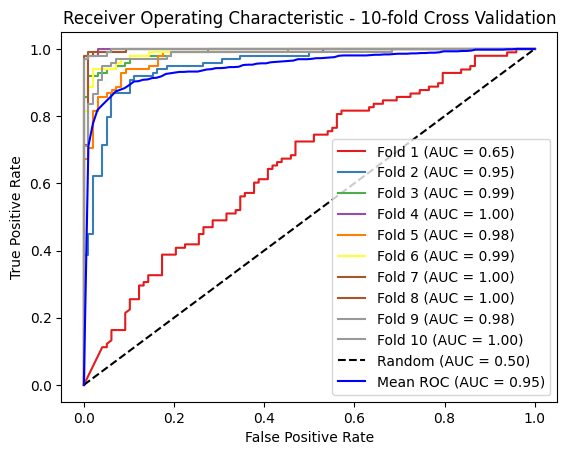

In [38]:
epitope_model = keras.Sequential()
epitope_model.add(layers.Dense(50, activation='relu', input_shape=(45,)))
epitope_model.add(layers.Dense(50, activation='relu'))
epitope_model.add(layers.Dense(50, activation='relu'))
epitope_model.add(layers.Dense(1, activation='sigmoid'))

epitope_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

np.random.seed(42)

n_folds = 10

skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

interp_tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

colors = plt.cm.get_cmap('Set1', n_folds)

for i, (train_index, test_index) in enumerate(skf.split(x, y)):
    print("Fold", i+1)

    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tf.random.set_seed(42)

    epitope_model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

    y_pred_prob = epitope_model.predict(x_test)
    y_pred_prob_positive = y_pred_prob[:, 0]



    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_positive)

    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

    auc = roc_auc_score(y_test, y_pred_prob_positive)
    aucs.append(auc)

    plt.plot(fpr, tpr, color=colors(i), label='Fold {} (AUC = {:.2f})'.format(i+1, auc))

mean_tpr = np.mean(interp_tprs, axis=0)
mean_auc = np.mean(aucs)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = {:.2f})'.format(mean_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - 10-fold Cross Validation')
plt.legend(loc='lower right')
plt.show()

Epitope type (CD4/CD8) classification

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10


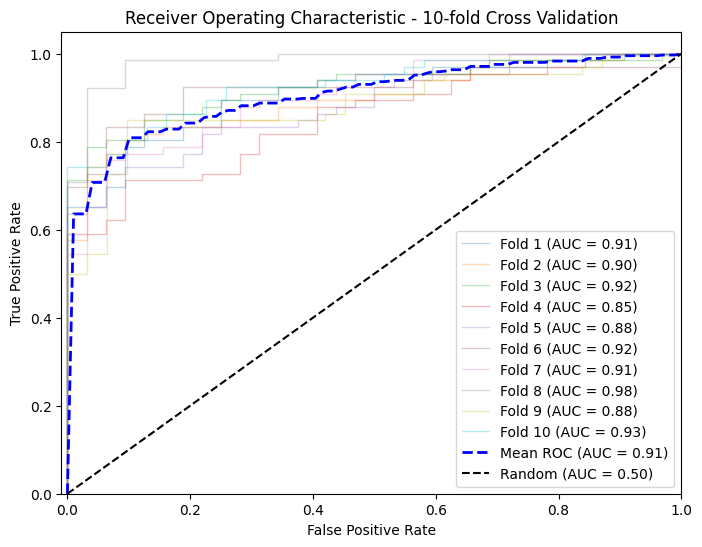

In [39]:
epitope_type_data = pd.read_csv("/content/drive/MyDrive/Postdoctoral research/poxipred/epitope_type_dataset.csv")

X = epitope_type_data.iloc[:, 0:45].values
y = epitope_type_data.iloc[:, 46].values

sc = StandardScaler()

X = sc.fit_transform(X)

params = {
    'max_depth': 5,
    'learning_rate': 0.2,
    'n_estimators': 50,
    'gamma': 0.2,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

plt.figure(figsize=(8, 6))

roc_auc_scores = []
mean_fpr = np.linspace(0, 1, 100)
interp_tprs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print("Fold", i+1)

    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    epitope_type_model = xgb.XGBClassifier(**params)
    epitope_type_model.fit(x_train, y_train)

    y_pred_prob = epitope_type_model.predict_proba(x_test)
    y_pred_prob_positive = y_pred_prob[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_positive)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

mean_tpr = np.mean(interp_tprs, axis=0)
mean_auc = np.mean(roc_auc_scores)

plt.plot(mean_fpr, mean_tpr, color='b', lw=2, linestyle='--', label=f'Mean ROC (AUC = {mean_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - 10-fold Cross Validation')
plt.legend(loc='lower right')
plt.show()


Predicting epitopes in novel data

In [ ]:
pip install Bio

In [41]:
from Bio import SeqIO

In [42]:
def Z(protein):
    z = {
        "A": [0.07, -1.73, 0.09],
        "V": [-2.69, -2.53, -1.29],
        "L": [-4.19, -1.03, -0.98],
        "I": [-4.44, -1.68, -1.03],
        "P": [-1.22, 0.88, 2.23],
        "F": [-4.92, 1.30, 0.45],
        "W": [-4.75, 3.65, 0.85],
        "M": [-2.49, -0.27, -0.41],
        "K": [2.84, 1.41, -3.14],
        "R": [2.88, 2.52, -3.44],
        "H": [2.41, 1.74, 1.11],
        "G": [2.23, -5.36, 0.30],
        "S": [1.96, -1.63, 0.57],
        "T": [0.92, -2.09, -1.40],
        "C": [0.71, -0.97, 4.13],
        "Y": [-1.39, 2.32, 0.01],
        "N": [3.22, 1.45, 0.84],
        "Q": [2.18, 0.53, -1.14],
        "D": [3.64, 1.13, 2.36],
        "E": [3.08, 0.39, -0.07]
    }

    z_values = []
    for character in protein:
        z_values.append(z.get(character, [0, 0, 0]))

    return z_values

In [43]:
def ACC(protein):
    ACCN = [0] * 45
    z_values = Z(protein)

    for l in range(1, 6):
        n = len(z_values)
        cal = 0
        for j in range(n - l):
            cal += (z_values[j][0] * z_values[j+1][0] / (n - l))
        ACCN[(l-1)*9] = cal

        cal = 0
        for j in range(n - l):
            cal += (z_values[j][1] * z_values[j+1][1] / (n - l))
        ACCN[(l-1)*9 + 1] = cal

        cal = 0
        for j in range(n - l):
            cal += (z_values[j][2] * z_values[j+1][2] / (n - l))
        ACCN[(l-1)*9 + 2] = cal

        cal = 0
        for j in range(n - l):
            cal += (z_values[j][0] * z_values[j+1][1] / (n - l))
        ACCN[(l-1)*9 + 3] = cal

        cal = 0
        for j in range(n - l):
            cal += (z_values[j][0] * z_values[j+1][2] / (n - l))
        ACCN[(l-1)*9 + 4] = cal

        cal = 0
        for j in range(n - l):
            cal += (z_values[j][1] * z_values[j+1][0] / (n - l))
        ACCN[(l-1)*9 + 5] = cal

        cal = 0
        for j in range(n - l):
            cal += (z_values[j][1] * z_values[j+1][2] / (n - l))
        ACCN[(l-1)*9 + 6] = cal

        cal = 0
        for j in range(n - l):
            cal += (z_values[j][2] * z_values[j+1][0] / (n - l))
        ACCN[(l-1)*9 + 7] = cal

        cal = 0
        for j in range(n - l):
            cal += (z_values[j][2] * z_values[j+1][1] / (n - l))
        ACCN[(l-1)*9 + 8] = cal

    return ACCN


In [44]:
import csv

In [ ]:
path_proteomes = "/content/drive/MyDrive/Postdoctoral research/epipred/poxviruses_proteome/"
path_out = "/content/drive/MyDrive/Postdoctoral research/poxipred/output_v2/"

i=0
output = []
for item in os.listdir(path_proteomes):
  if item.endswith('.fasta'):
   with open(path_proteomes+item, 'r') as file:
    output = []
    print(item)
    for record in SeqIO.parse(file, 'fasta'):
      record_acc = ACC(record.seq)
      record_acc = np.reshape(record_acc, (1, 45))
      prediction_antigen = antigen_model.predict(record_acc)

      if prediction_antigen>0.05:
        print(record.seq)
        max_attempts = len(record.seq)//14
        counter = 0
        predicted_epitopes = 0

        while True:
          if counter >= max_attempts or predicted_epitopes == 5:
              break

          counter += 1
          size_epitope = random.randint(8, 14)
          epitope = record.seq[counter:counter + size_epitope]

          epitope_acc = ACC(epitope)
          epitope_acc = np.reshape(epitope_acc, (1, 45))
          prediction_epitope = epitope_model.predict(epitope_acc)
          print(prediction_epitope)

          if prediction_epitope > 0.5:
              predicted_epitopes += 1
              prediction_epitope_type = epitope_type_model.predict(epitope_acc)

              if prediction_epitope_type == 0:
                  epitope_type = "CD4"
                  index_second_pipe = record.description.find("|", record.description.find("|") + 1)
                  os_index = record.description.find("OS=")
                  inbetween = record.description[index_second_pipe + 1:os_index].strip()
                  inbetween = inbetween.split(" ")[1:]
                  combined_string = " ".join(inbetween)
                  output.append(
                      {
                          "description": combined_string,
                          "epitope": str(epitope),
                          "epitope_type": epitope_type
                      }
                  )
              else:
                  epitope_type = "CD8"
                  index_second_pipe = record.description.find("|", record.description.find("|") + 1)
                  os_index = record.description.find("OS=")
                  inbetween = record.description[index_second_pipe + 1:os_index].strip()
                  inbetween = inbetween.split(" ")[1:]
                  combined_string = " ".join(inbetween)
                  output.append(
                      {
                          "description": combined_string,
                          "epitope": str(epitope),
                          "epitope_type": epitope_type
                      }
                  )


    csv_content = []
    csv_content.append(['Description',
                                'Epitope',
                                'Epitope Type'])

    for sequence in output:
      csv_content.append([sequence['description'],
                                  sequence['epitope'],
                                  sequence['epitope_type']])
    with open(path_out+item+".csv", mode='w', newline='') as file:
      writer = csv.writer(file)
      writer.writerows(csv_content)









